# Module 3: Data Exploration

Data exploration refers to the preliminary investigation of data in order
to better understand its specific characteristics. There are two key motivations for data exploration:
1. To help users select the appropriate preprocessing and data analysis technique used.
2. To make use of humansâ€™ abilities to recognize patterns in the data.

Read the step-by-step instructions below carefully. To execute the code, click on the cell and press the SHIFT-ENTER keys simultaneously.

In [ ]:
import pandas as pd

data = pd.read_csv('Bank_Transaction_Fraud_Detection_73c72160b56f54fa7f6a2dfea21055b7.csv')


data

FileNotFoundError: [Errno 2] No such file or directory: 'Bank_Transaction_Fraud_Detection.csv'

In [ ]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


**2.** show some information

**<font color="red">Code:</font>**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

**3.** For the qualitative attribute (class), count the frequency for each of its distinct values.

**<font color="red">Code:</font>**

In [ ]:
data['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,52326
No,35667
NM,12007


In [ ]:
data['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,53174
Poor,28998
Good,17828


In [ ]:
import numpy as np  # Import NumPy
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Splitting the dataset into features and target variable
X = data.drop(columns=['Credit_Score'])
y = data['Credit_Score']

# Identify and encode non-numeric features
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    # Replace 'Tomz' with NaN before encoding
    X[col] = X[col].replace('Tomz', np.nan)
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# Handling missing or invalid data
# This step is now redundant since 'Tomz' was already replaced with NaN
# X = X.replace('Tomz', np.nan)  # Replace 'Tomz' with NaN
X = X.dropna()  # Drop rows with NaN


# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check balanced class distribution
print("Original class distribution:\n", y.value_counts())
print("Balanced class distribution:\n", y_train_balanced.value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Original class distribution:
 Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64
Balanced class distribution:
 Credit_Score
Standard    42575
Good        42575
Poor        42575
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Apply oversampling
X_over, y_over = oversampler.fit_resample(X, y)

# Check class distribution after oversampling
print("Class distribution after oversampling:")
print(y_over.value_counts())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Class distribution after oversampling:
Credit_Score
Good        53174
Standard    53174
Poor        53174
Name: count, dtype: int64


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling
X_under, y_under = undersampler.fit_resample(X, y)

# Check class distribution after undersampling
print("Class distribution after undersampling:")
print(y_under.value_counts())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Class distribution after undersampling:
Credit_Score
Good        17828
Poor        17828
Standard    17828
Name: count, dtype: int64


In [ ]:
from imblearn.combine import SMOTEENN

# Initialize SMOTEENN (SMOTE + Edited Nearest Neighbors)
smote_enn = SMOTEENN(random_state=42)

# Apply combined sampling
X_combined, y_combined = smote_enn.fit_resample(X, y)

# Check class distribution after combined sampling
print("Class distribution after combined sampling:")
print(y_combined.value_counts())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

Class distribution after combined sampling:
Credit_Score
Good        41344
Poor        38170
Standard    34403
Name: count, dtype: int64


**4.** It is also possible to display the summary for all the attributes simultaneously in a table using the describe() function. If an attribute is quantitative, it will display its mean, standard deviation and various quantiles (including minimum, median, and maximum) values. If an attribute is qualitative, it will display its number of unique values and the top (most frequent) values.

**<font color="red">Code:</font>**

In [ ]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


**5.** For multivariate statistics, you can compute the covariance and correlation between pairs of attributes.

**<font color="red">Code:</font>**

In [ ]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
print('Covariance:')
print(numerical_data.cov())





Covariance:
                                    ID   Customer_ID         Month  \
ID                        1.875019e+09  7.674354e+05  5.250053e+00   
Customer_ID               7.674354e+05  2.056512e+08  1.615279e-14   
Month                     5.250053e+00  1.615279e-14  5.250053e+00   
Age                       1.555800e+03 -3.353386e+02  4.190542e-01   
SSN                       1.474305e+11  2.406154e+10  2.503420e-11   
Annual_Income            -8.884147e+06  5.914831e+06 -4.927692e-14   
Monthly_Inhand_Salary    -6.611264e+05  4.658887e+05 -1.327791e+01   
Num_Bank_Accounts         5.419494e+02 -4.420722e+01  4.700047e-04   
Num_Credit_Card          -1.701075e+02 -1.363797e+02  4.250043e-04   
Interest_Rate             1.497613e+03 -5.906862e+02 -7.744993e-18   
Num_of_Loan              -1.073725e+03  5.202081e+02 -5.340226e-18   
Delay_from_due_date      -3.032489e+03  9.726163e+02  1.159512e-02   
Num_of_Delayed_Payment    5.019506e+02  4.618205e+02  1.650017e-03   
Changed_

In [ ]:
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
print('Correlation:')
print(correlation_matrix)



Correlation:
                                ID   Customer_ID         Month       Age  \
ID                        1.000000  1.235872e-03  5.291503e-05  0.003338   
Customer_ID               0.001236  1.000000e+00 -6.660113e-17 -0.002172   
Month                     0.000053 -6.660113e-17  1.000000e+00  0.016990   
Age                       0.003338 -2.172258e-03  1.698955e-02  1.000000   
SSN                       0.011707  5.769305e-03 -1.557496e-16 -0.008411   
Annual_Income            -0.005357  1.076923e-02  1.530483e-17  0.091525   
Monthly_Inhand_Salary    -0.004792  1.019558e-02 -1.818625e-03  0.090636   
Num_Bank_Accounts         0.004826 -1.188701e-03  7.909795e-05 -0.190415   
Num_Credit_Card          -0.001900 -4.600690e-03  8.973261e-05 -0.148567   
Interest_Rate             0.003957 -4.712091e-03  6.790115e-18 -0.217557   
Num_of_Loan              -0.010136  1.482832e-02  1.555542e-16 -0.213533   
Delay_from_due_date      -0.004730  4.581213e-03  3.418202e-04 -0.174119   

## 3.2. Data Visualization

Data visualization is the display of information in a graphic or tabular format. Successful visualization requires that the data (information) be converted into a visual format so that the characteristics of the data and the relationships
among data items or attributes can be analyzed or reported.

In this tutorial, you will learn how to display the Iris data created in Section 3.1. To execute the sample program shown here, make sure you have installed the matplotlib library package (see Module 0 on how to install Python packages).

**1.** First, we will display the histogram for the sepal length attribute by discretizing it into 8 separate bins and counting the frequency for each bin.

**<font color="red">Code:</font>**

    Age  Annual_Income  Num_Bank_Accounts  Num_of_Loan Credit_Score
0  23.0       19114.12                3.0          4.0         Good
1  23.0       19114.12                3.0          4.0         Good
2  23.0       19114.12                3.0          4.0         Good
3  23.0       19114.12                3.0          4.0         Good
4  23.0       19114.12                3.0          4.0         Good


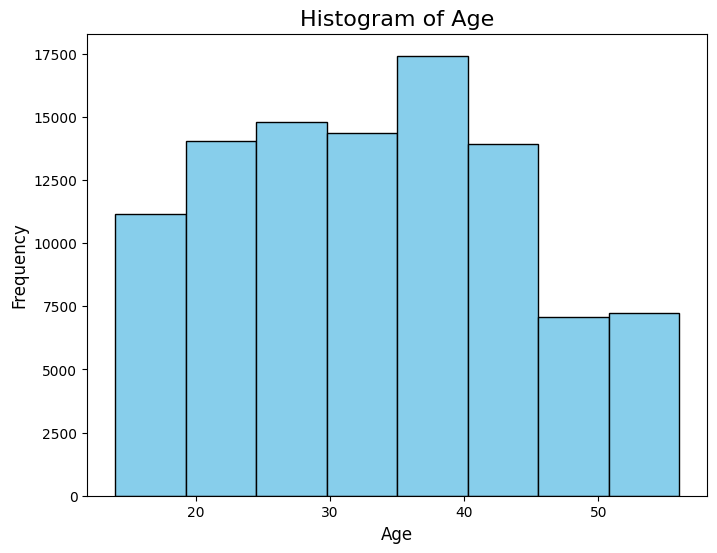

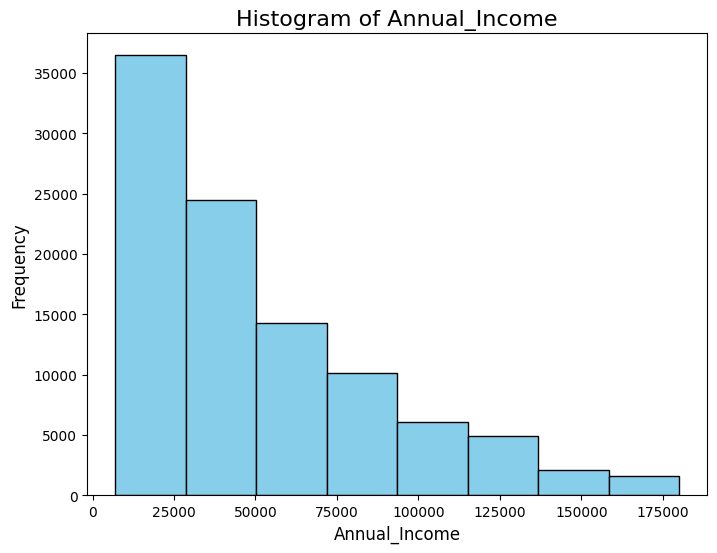

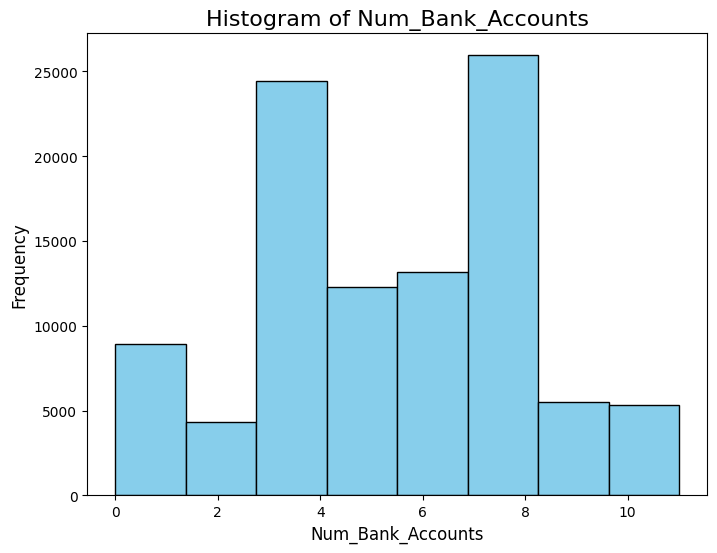

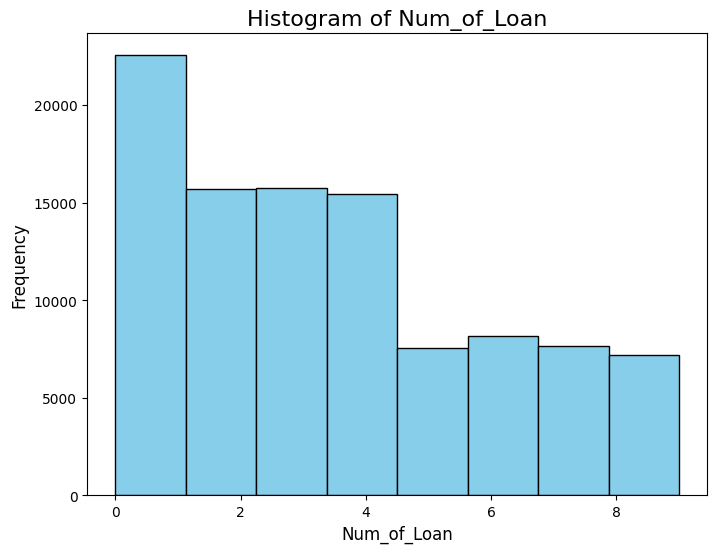

In [ ]:
selected_columns = ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_of_Loan', 'Credit_Score']
data_subset = data[selected_columns]

# Display the first few rows of the subset
print(data_subset.head())

# Plot histograms for the selected columns
for column in selected_columns[:-1]:  # Exclude the target column ('Credit_Score') from histogram
    plt.figure(figsize=(8, 6))
    data_subset[column].hist(bins=8, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(False)
    plt.show()


**2.** A boxplot can also be used to show the distribution of values for each attribute.

**<font color="red">Code:</font>**

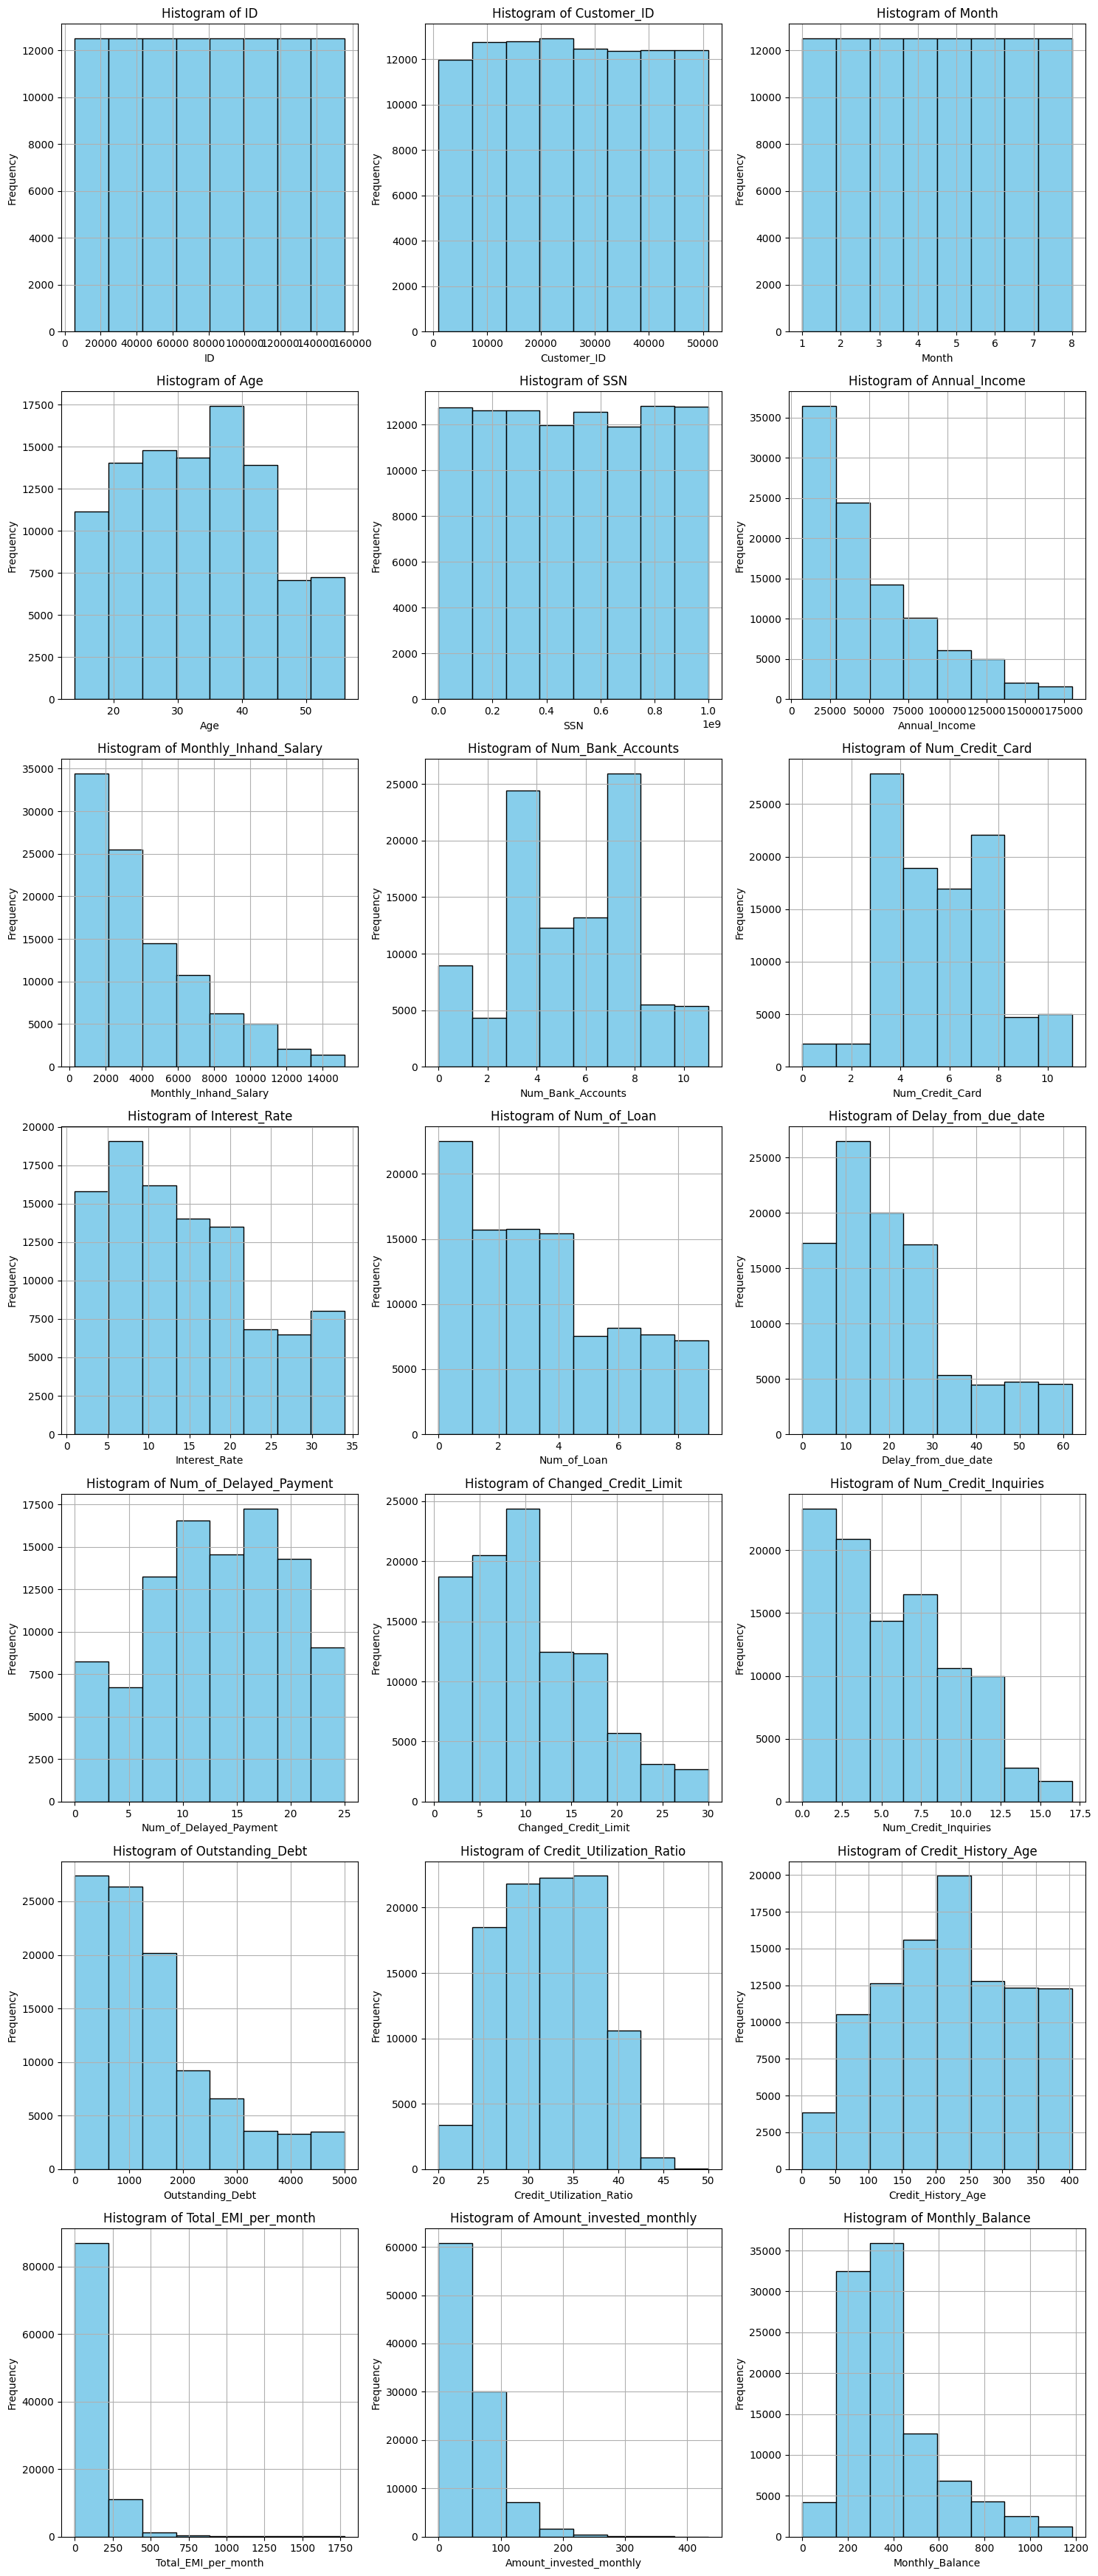

In [ ]:
import matplotlib.pyplot as plt

# Select numerical attributes from the dataset
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data_subset = data[numerical_columns]

# Plot histograms for all numerical columns
num_columns = len(data_subset.columns)
rows = (num_columns // 3) + (1 if num_columns % 3 != 0 else 0)  # Determine rows needed for subplots

plt.figure(figsize=(15, rows * 5))  # Adjust figure size dynamically

for idx, column in enumerate(data_subset.columns):
    plt.subplot(rows, 3, idx + 1)  # Create subplots with 3 columns per row
    data_subset[column].hist(bins=8, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


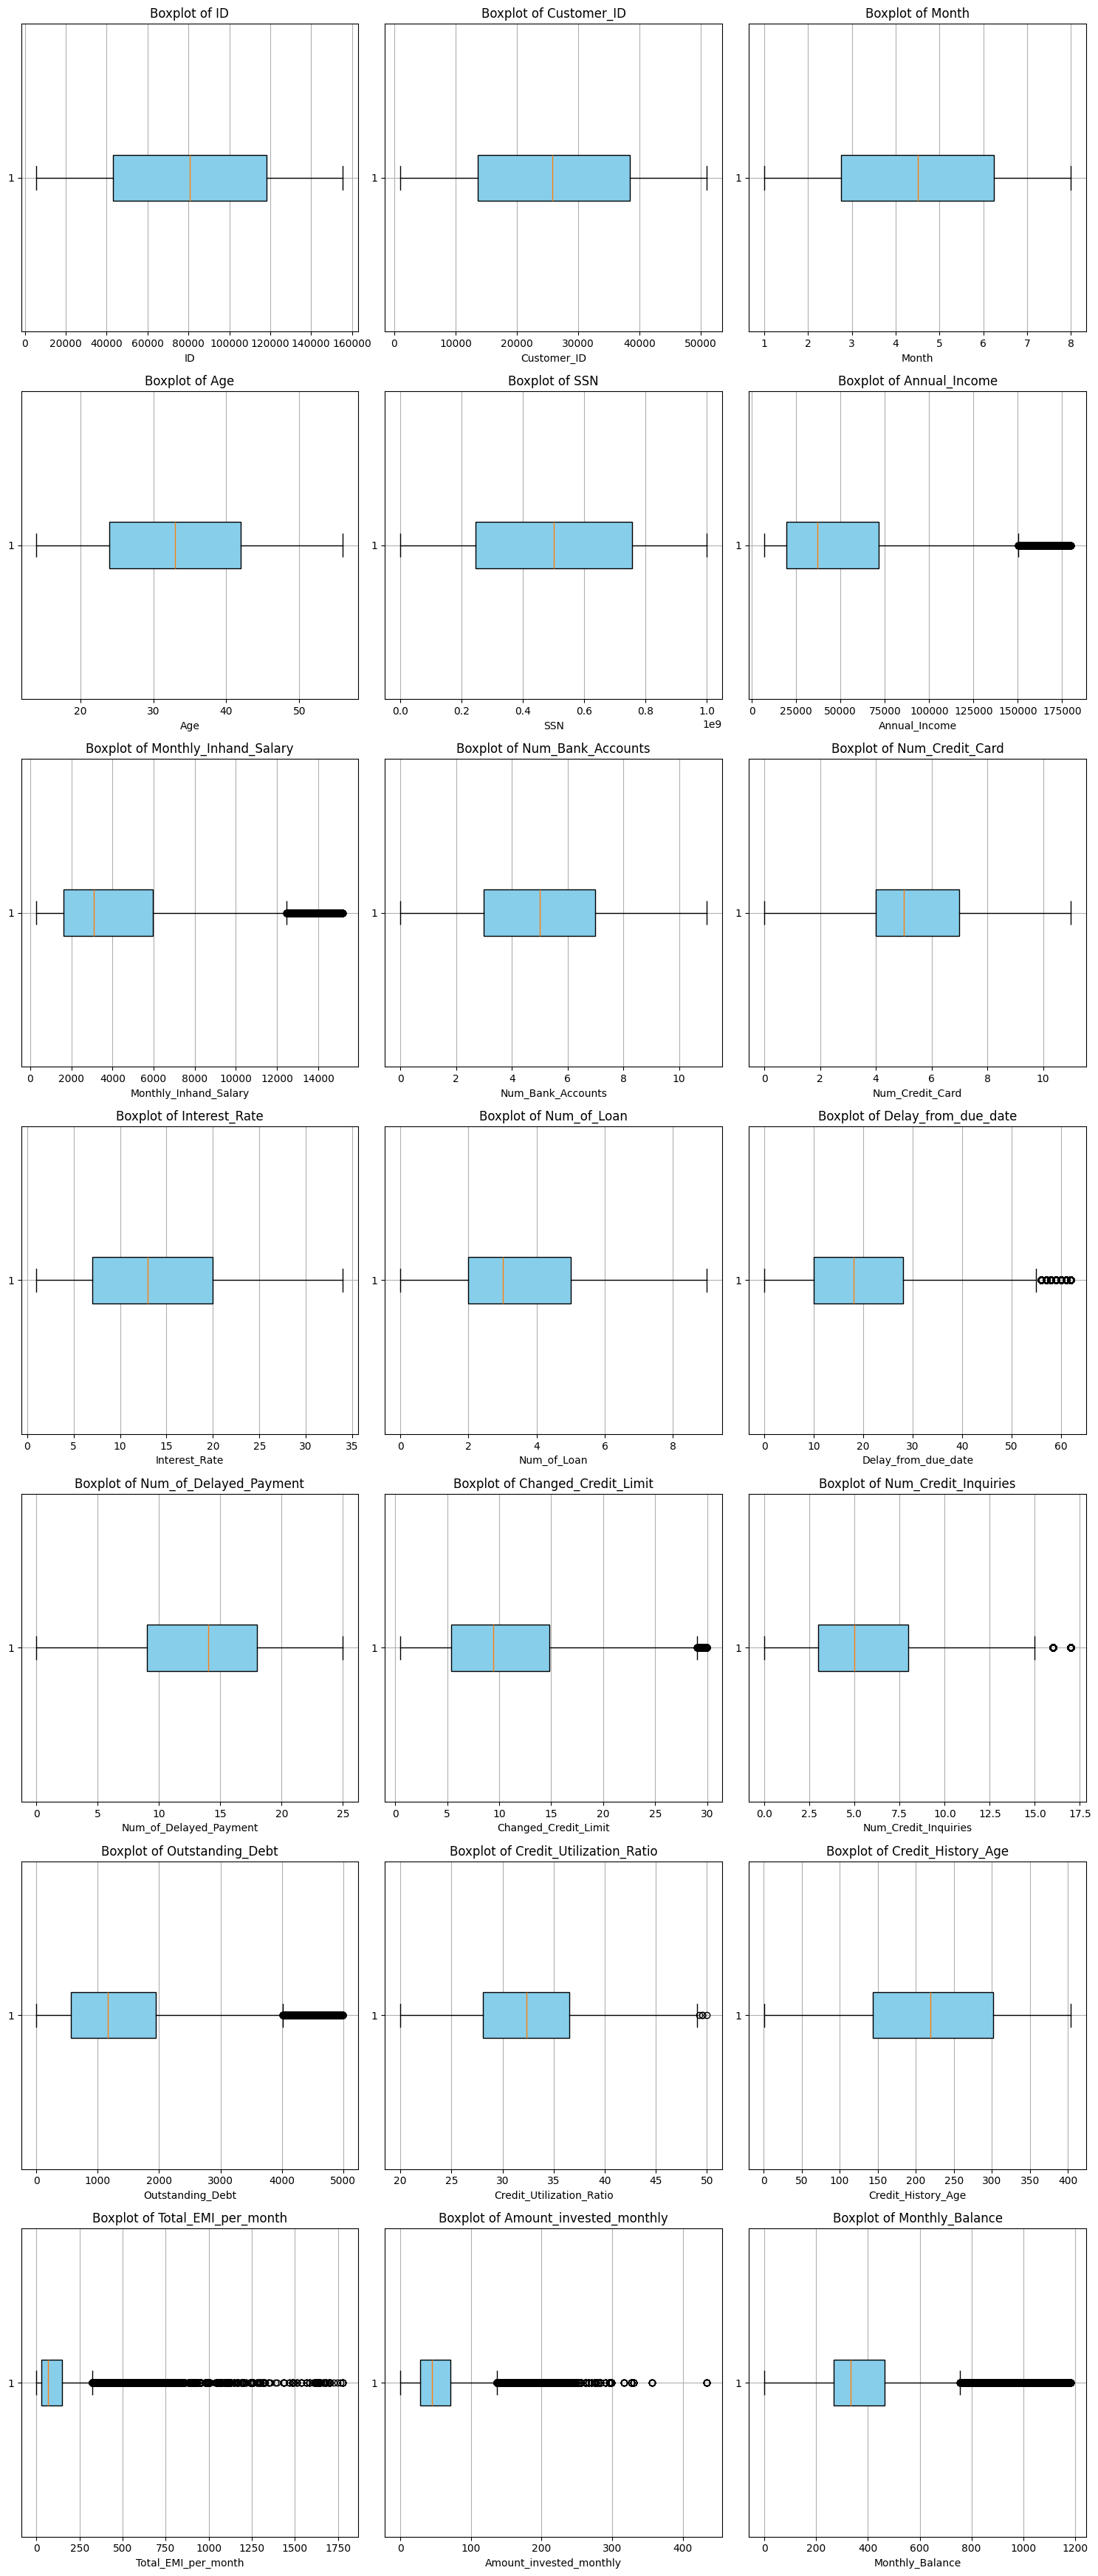

In [ ]:
import matplotlib.pyplot as plt

# Select numerical attributes from the dataset
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data_subset = data[numerical_columns]

# Plot boxplots for all numerical columns
num_columns = len(data_subset.columns)
rows = (num_columns // 3) + (1 if num_columns % 3 != 0 else 0)  # Determine rows needed for subplots

plt.figure(figsize=(15, rows * 5))  # Adjust figure size dynamically

for idx, column in enumerate(data_subset.columns):
    plt.subplot(rows, 3, idx + 1)  # Create subplots with 3 columns per row
    plt.boxplot(data_subset[column], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(f'Boxplot of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.grid(True)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


**3.** For each pair of attributes, we can use a scatter plot to visualize their joint distribution.

**<font color="red">Code:</font>**

In [ ]:
import matplotlib.pyplot as plt

General Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Feature1  6 non-null      int64
 1   Feature2  6 non-null      int64
 2   Cluster   6 non-null      int32
dtypes: int32(1), int64(2)
memory usage: 248.0 bytes
None

Summary Statistics for All Attributes:

       Feature1   Feature2   Cluster
count  6.000000   6.000000  6.000000
mean   3.500000  35.000000  0.333333
std    1.870829  18.708287  0.516398
min    1.000000  10.000000  0.000000
25%    2.250000  22.500000  0.000000
50%    3.500000  35.000000  0.000000
75%    4.750000  47.500000  0.750000
max    6.000000  60.000000  1.000000

Missing Values in Each Column:

Feature1    0
Feature2    0
Cluster     0
dtype: int64

Unique Values in Each Column:

Feature1: 6 unique values
Feature2: 6 unique values
Cluster: 2 unique values

Numerical Attributes - Histograms:


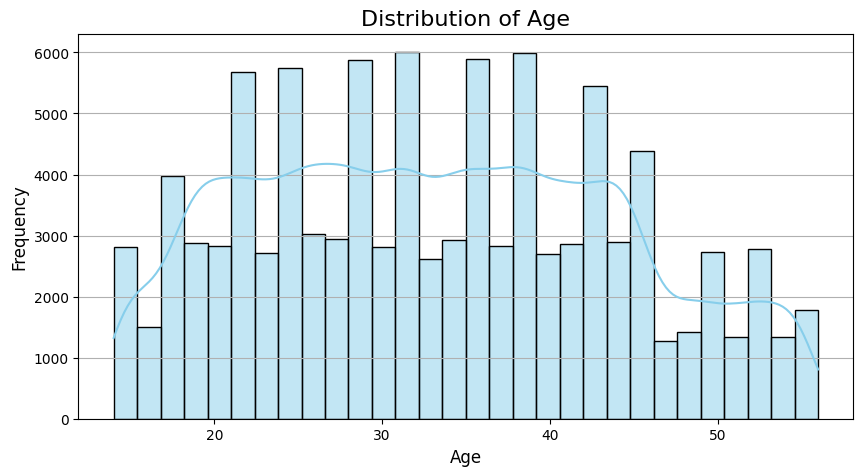

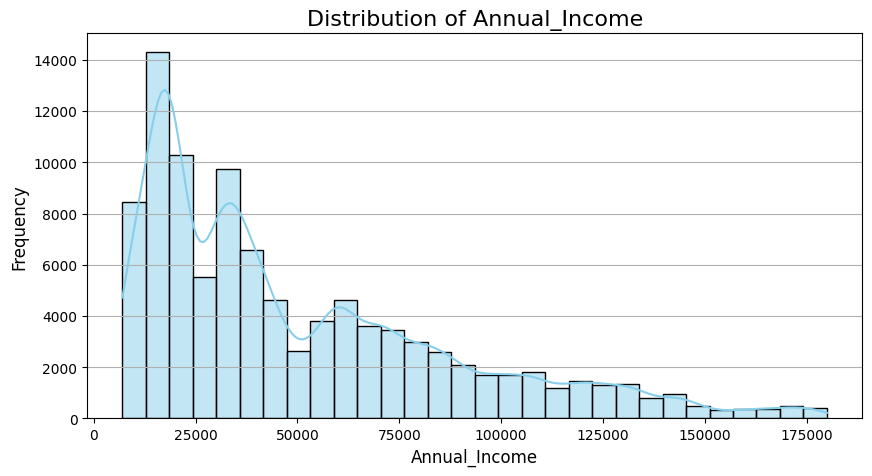

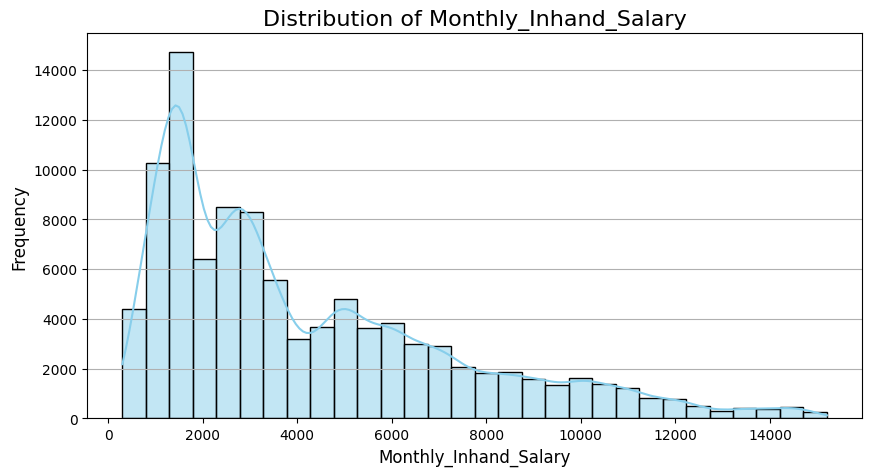

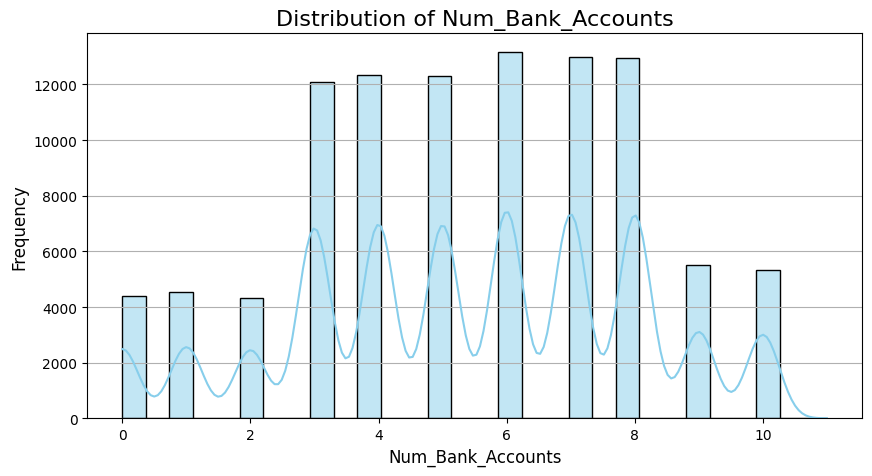

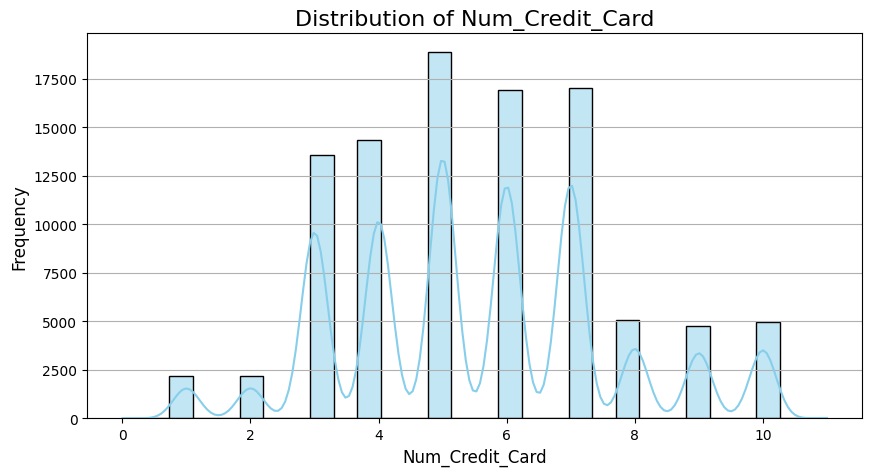

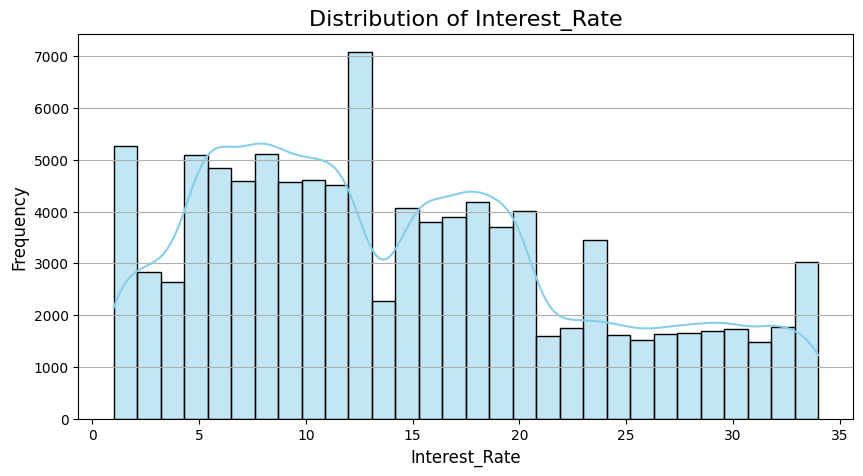

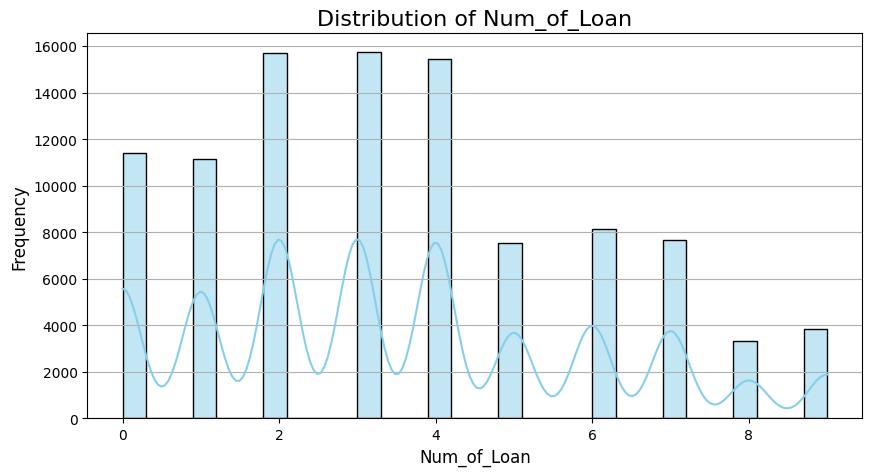

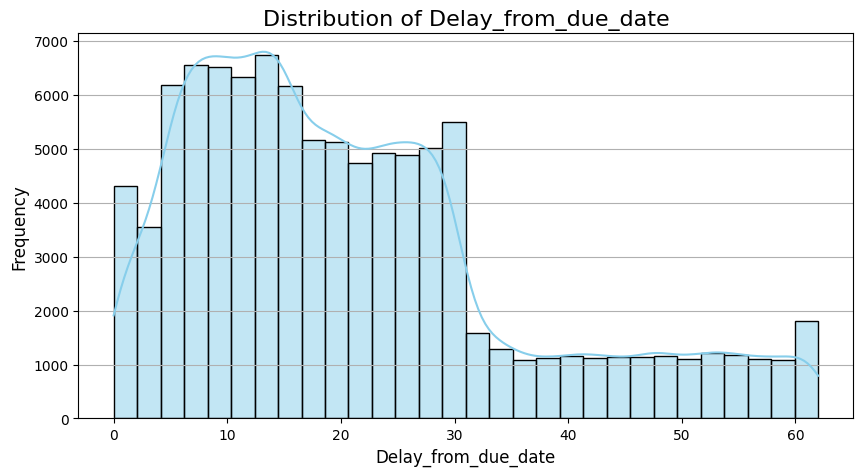

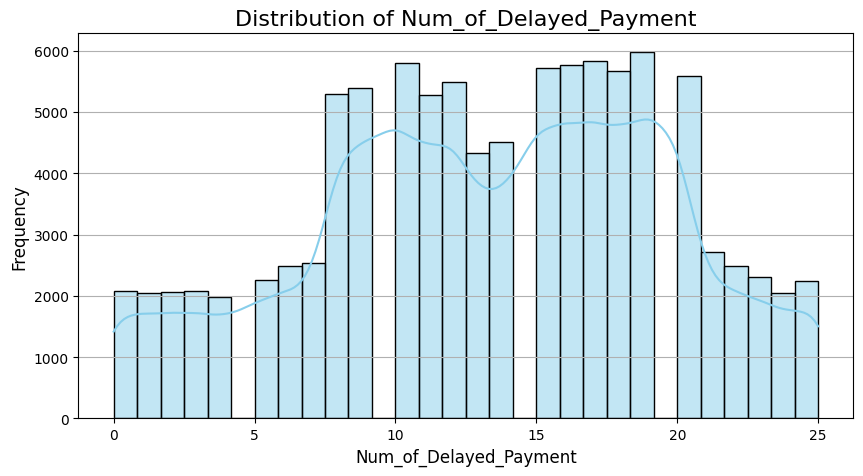

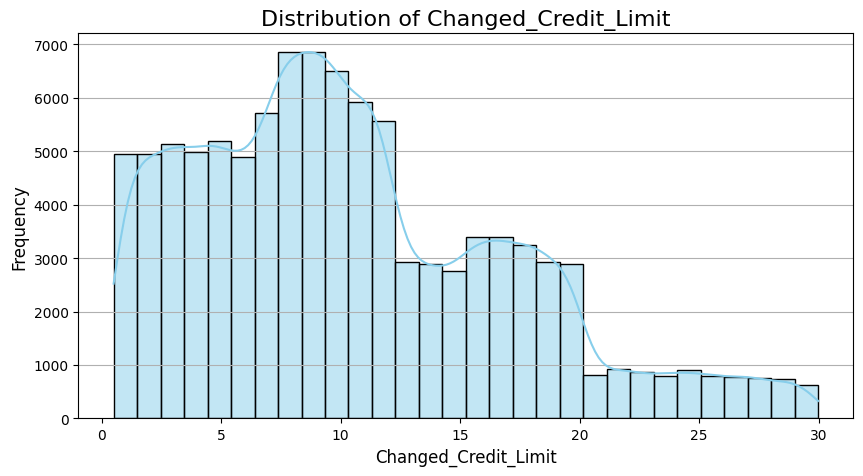

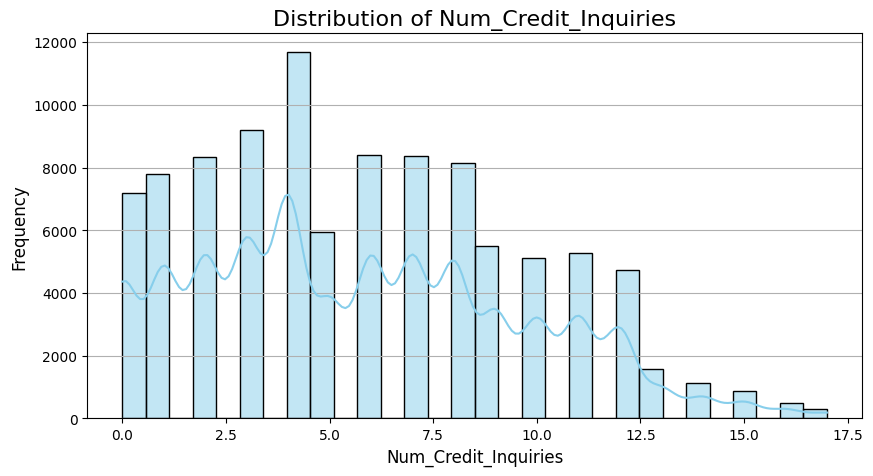

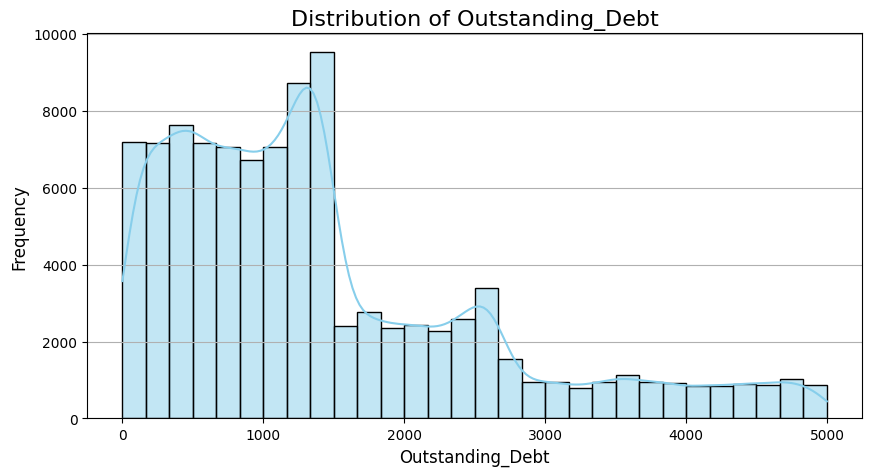

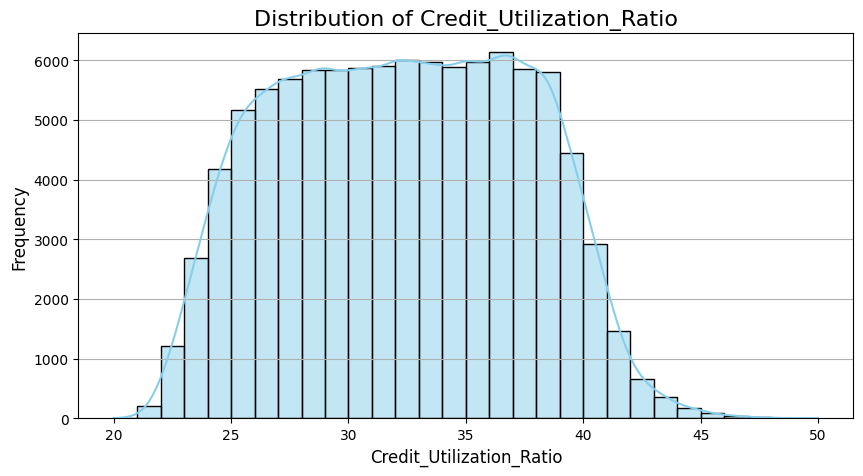

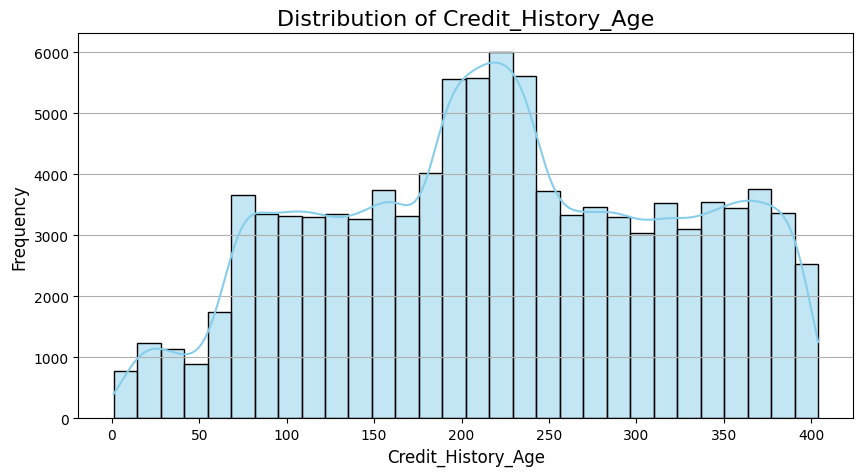

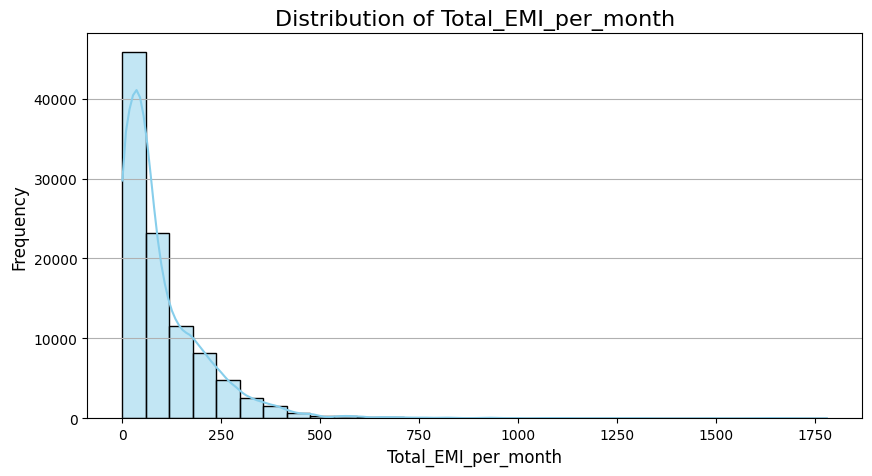

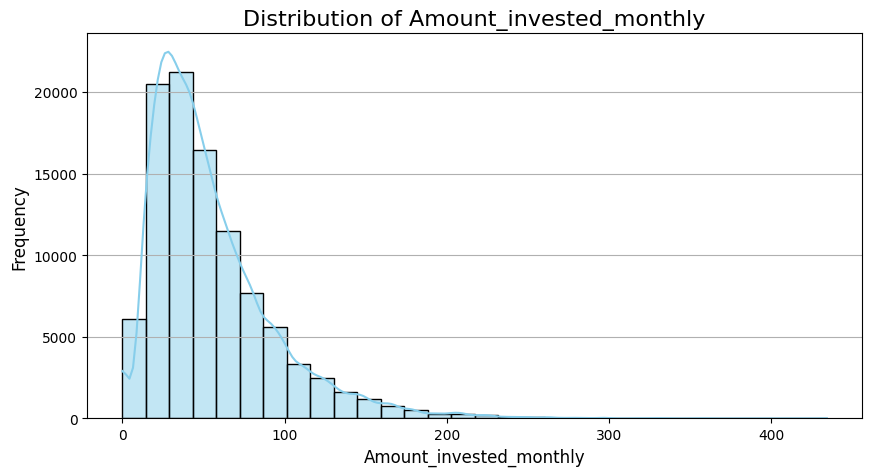

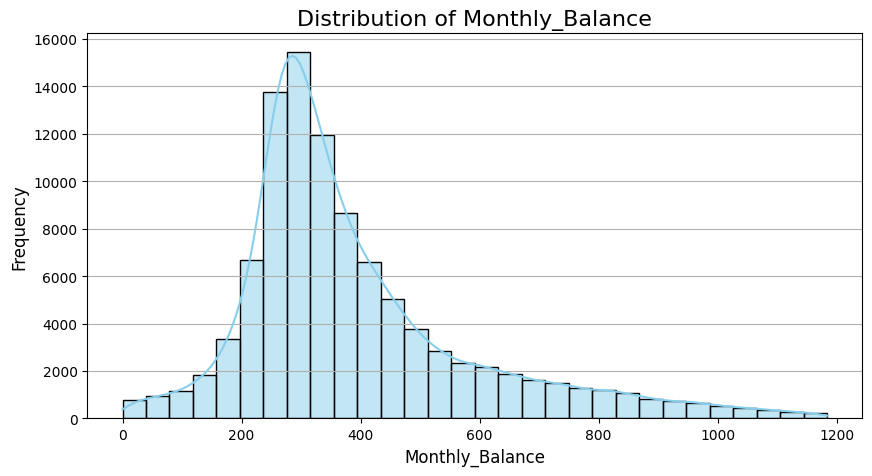


Categorical Attributes - Bar Plots:


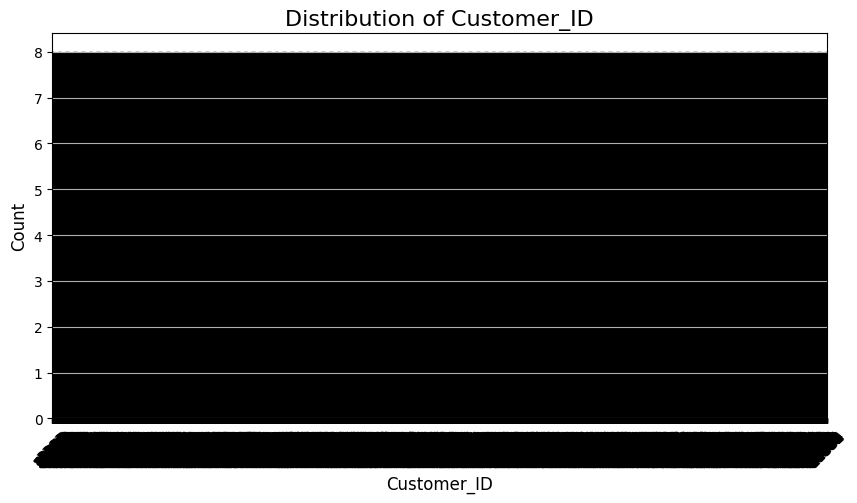

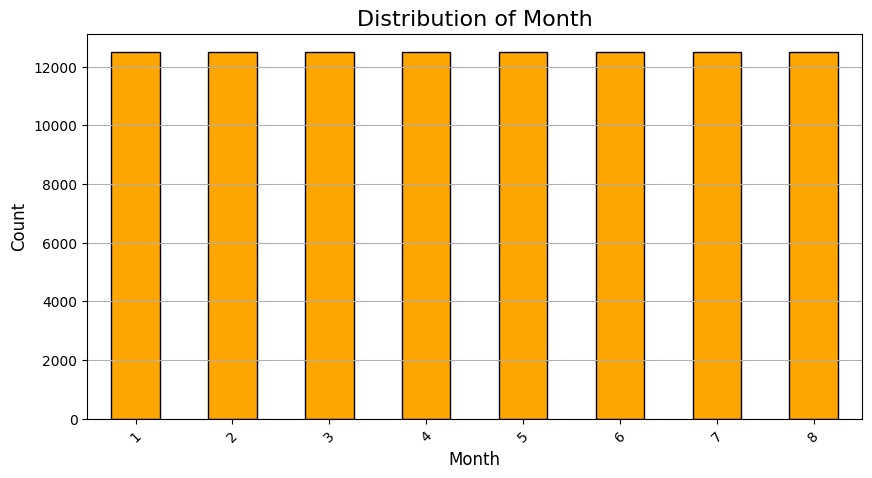

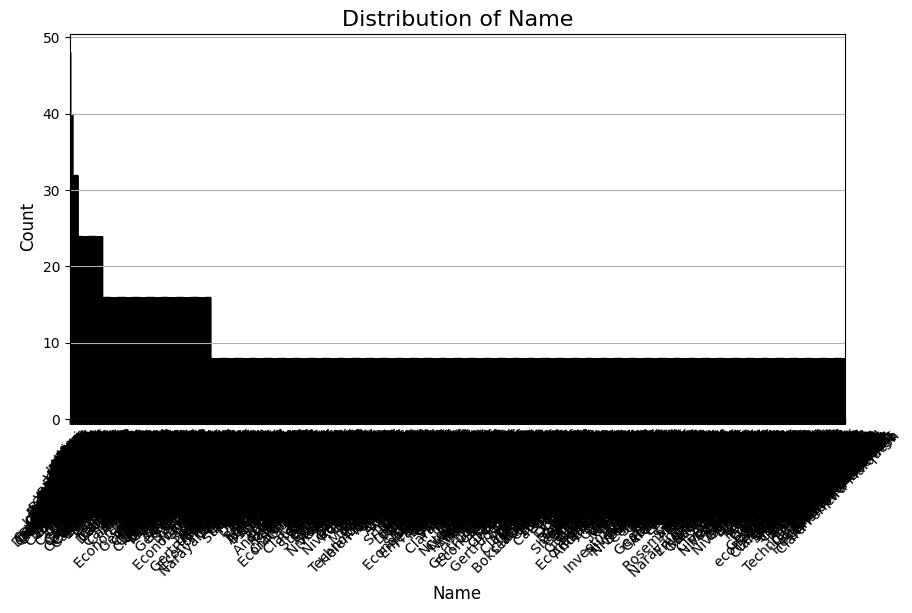

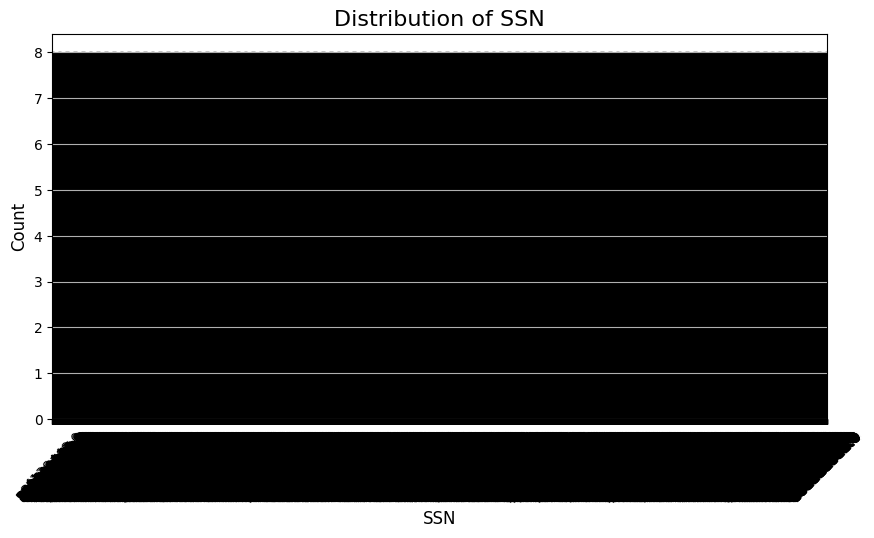

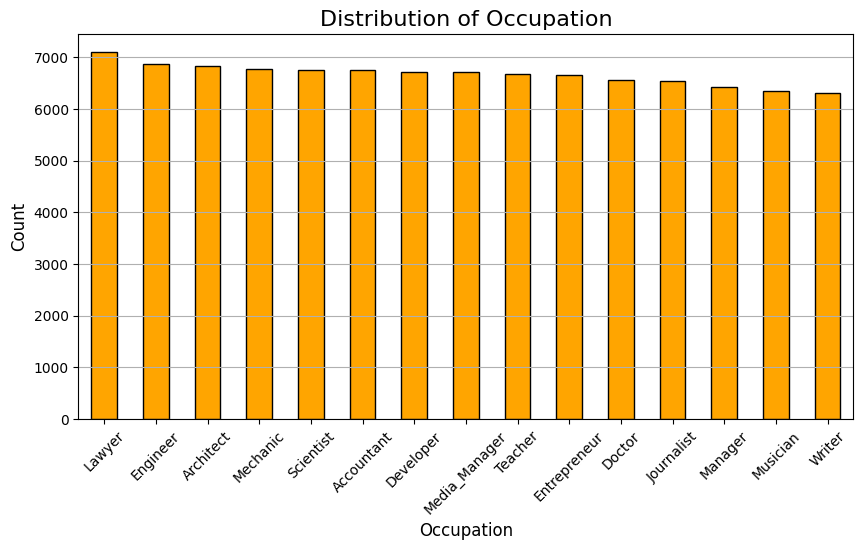

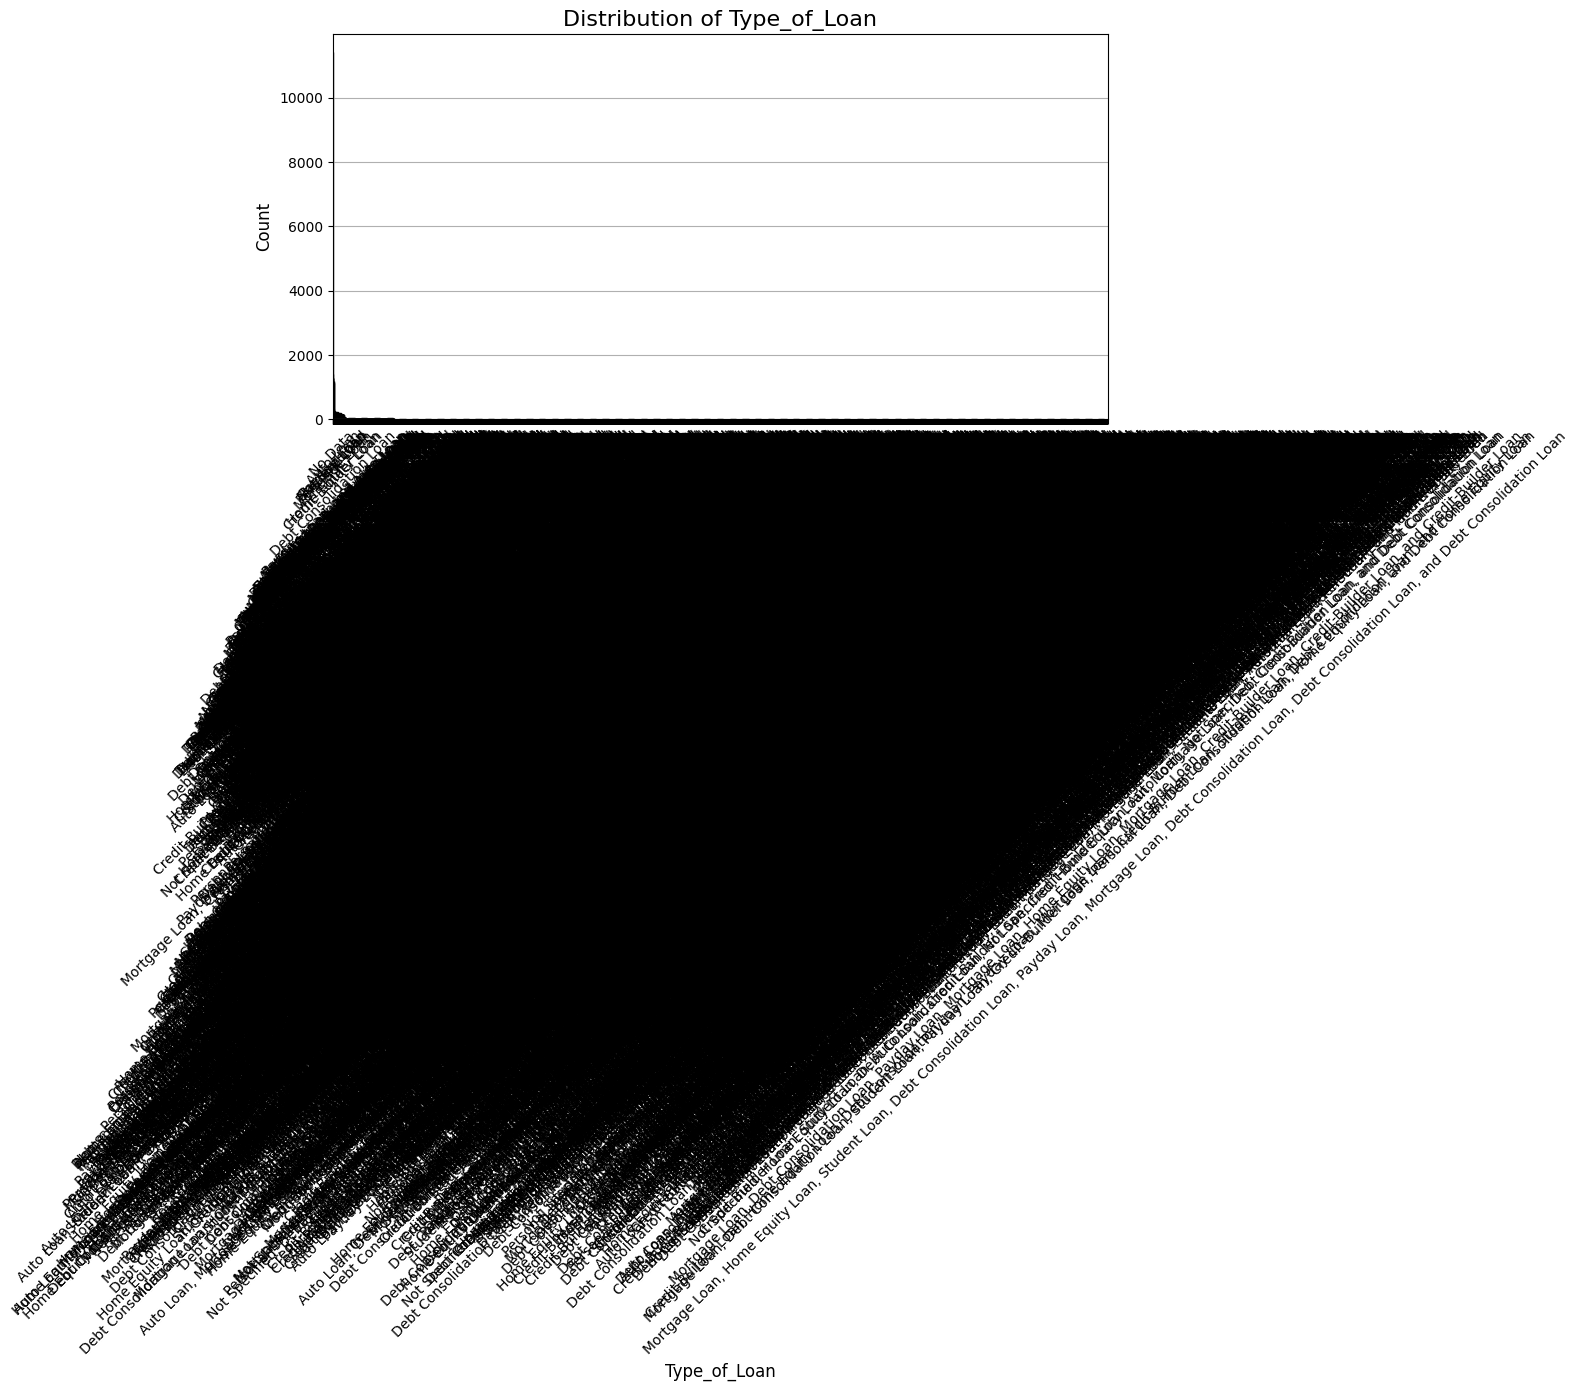

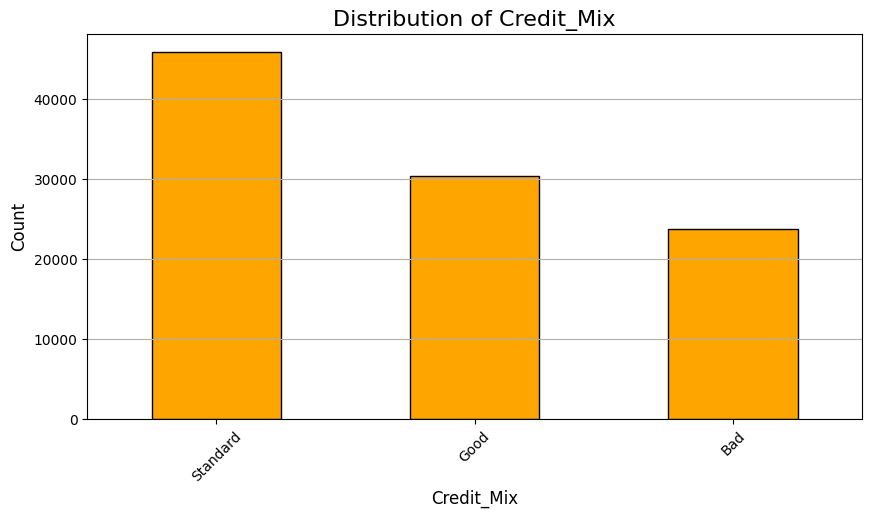

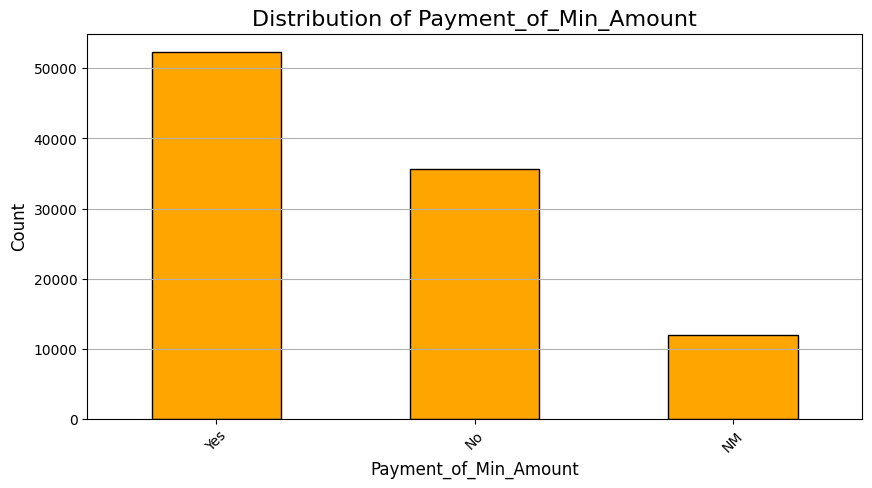

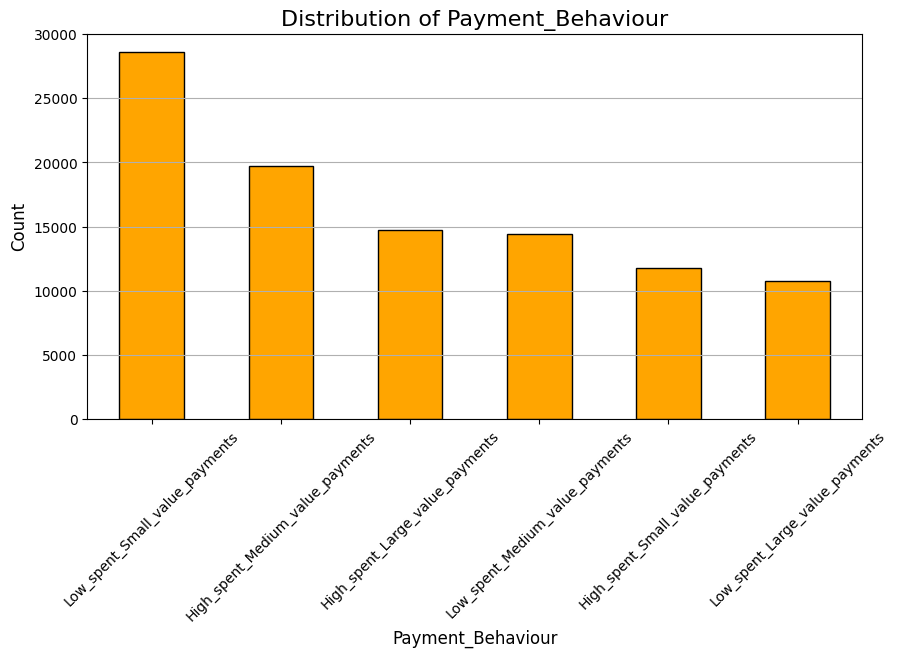

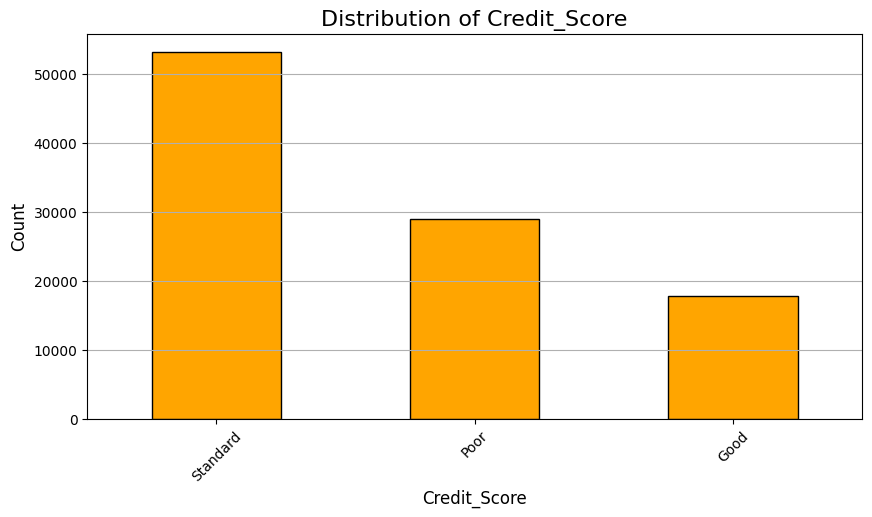


Correlation Heatmap:


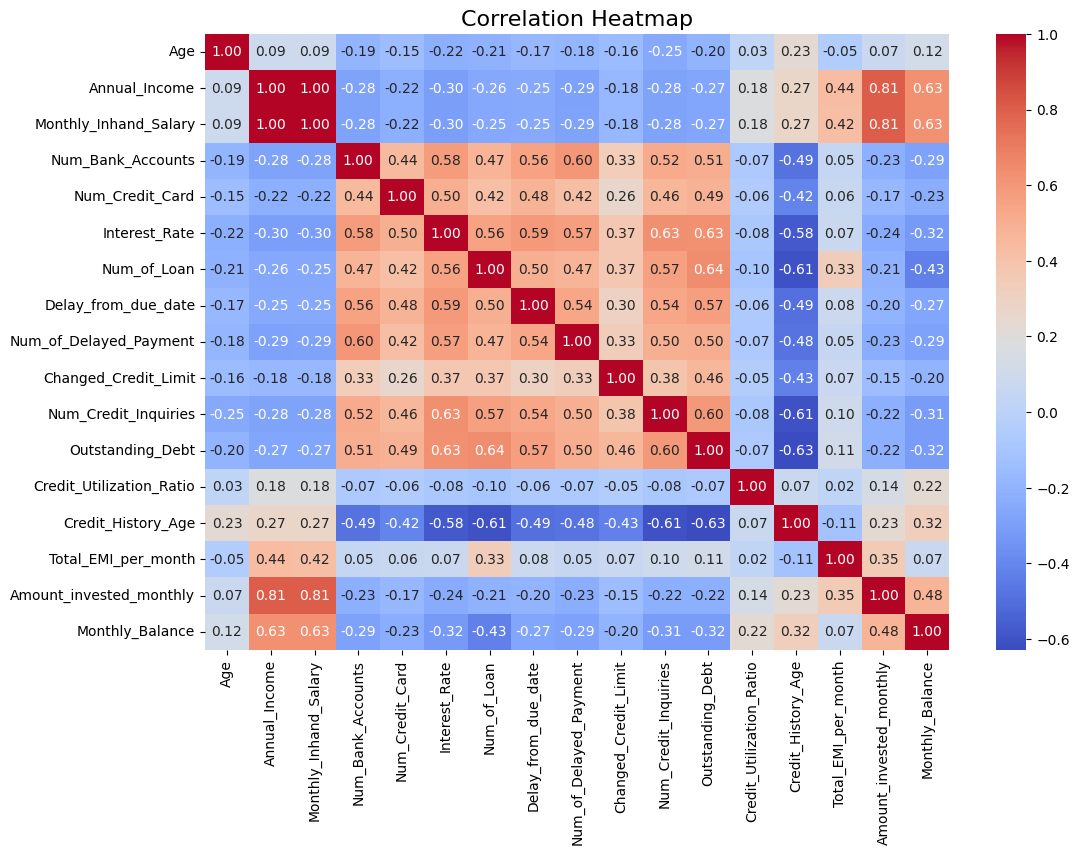


Boxplots for Numerical Attributes:


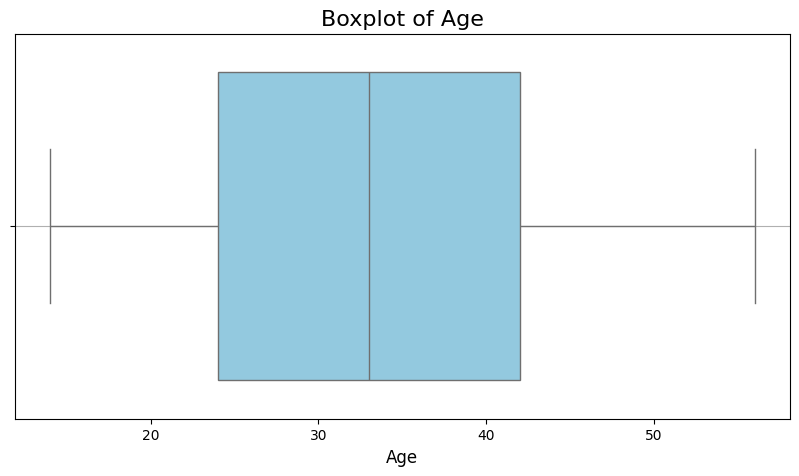

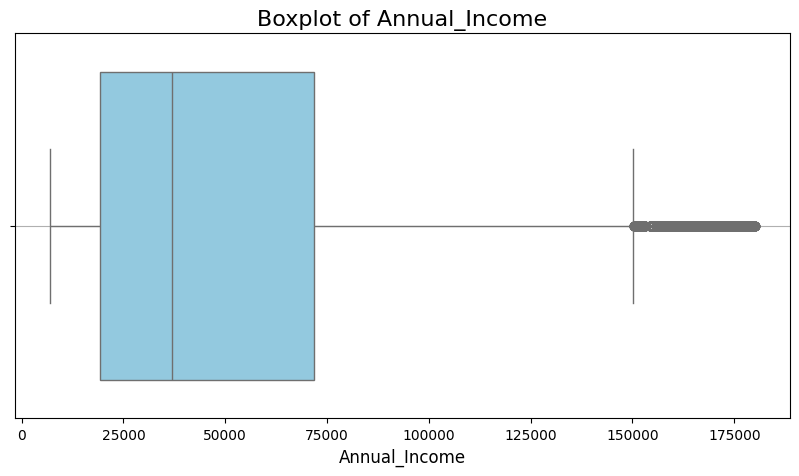

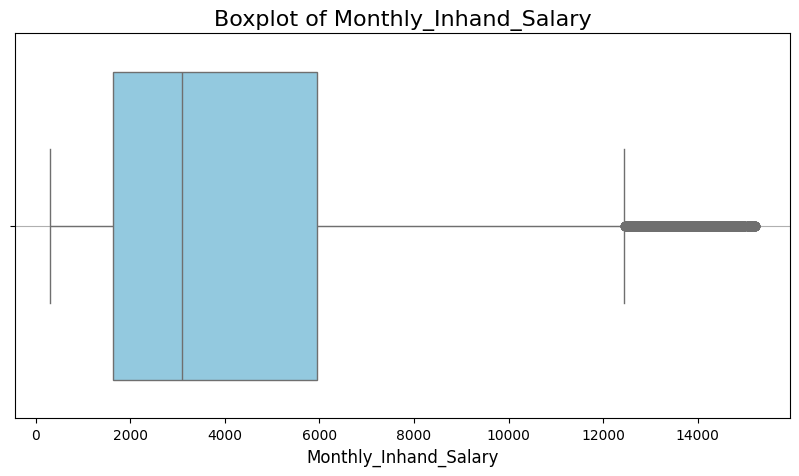

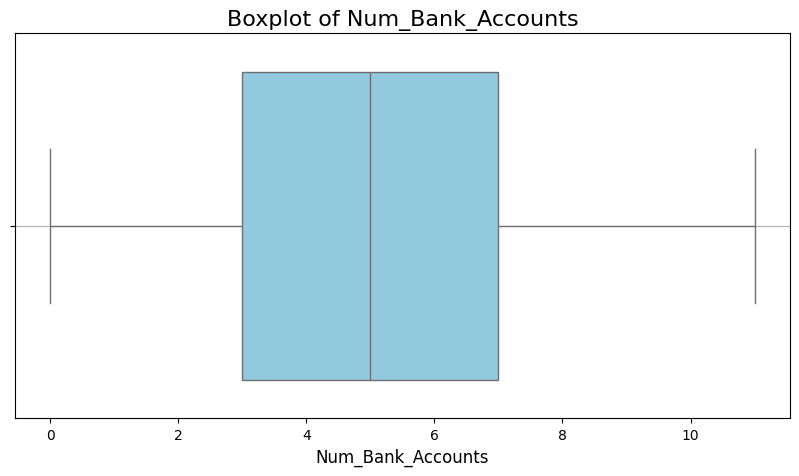

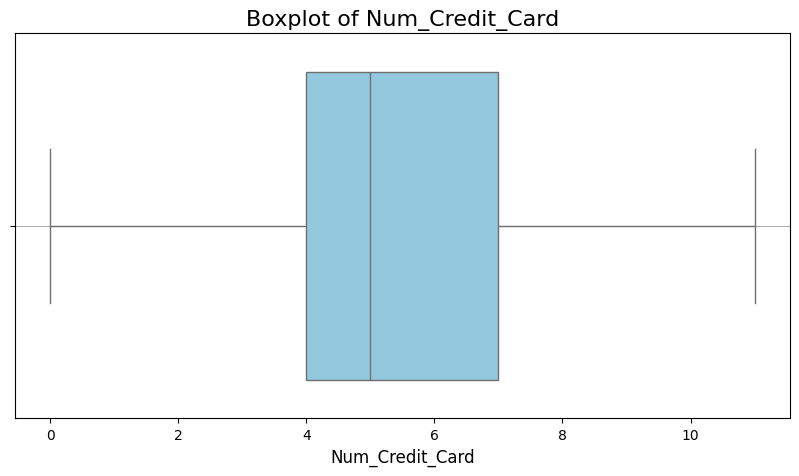

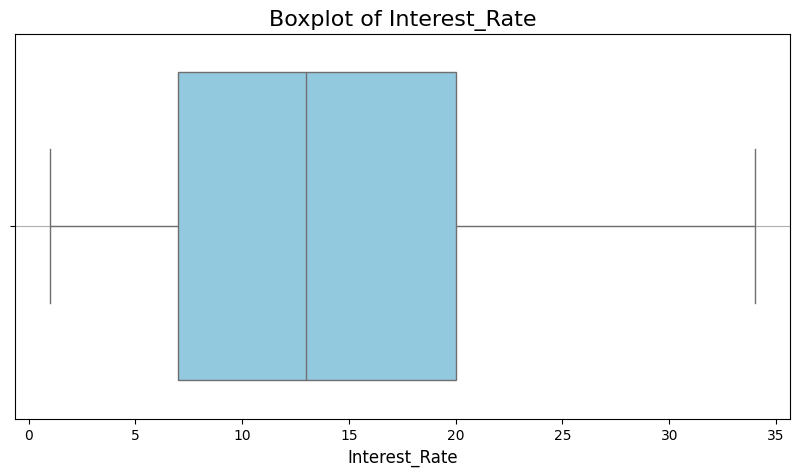

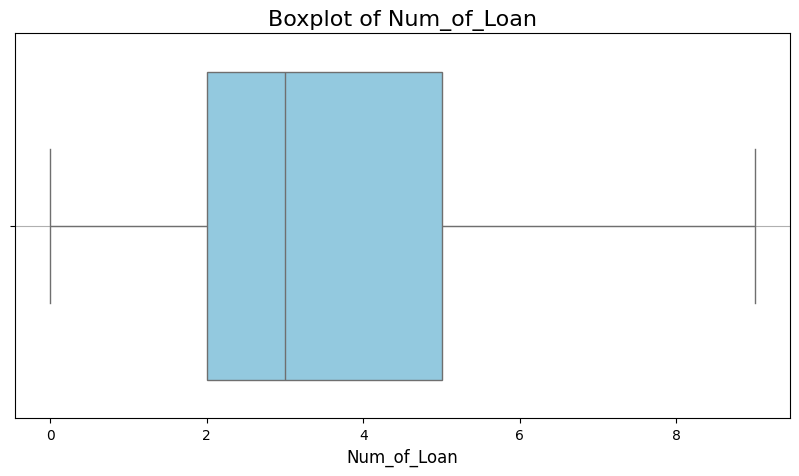

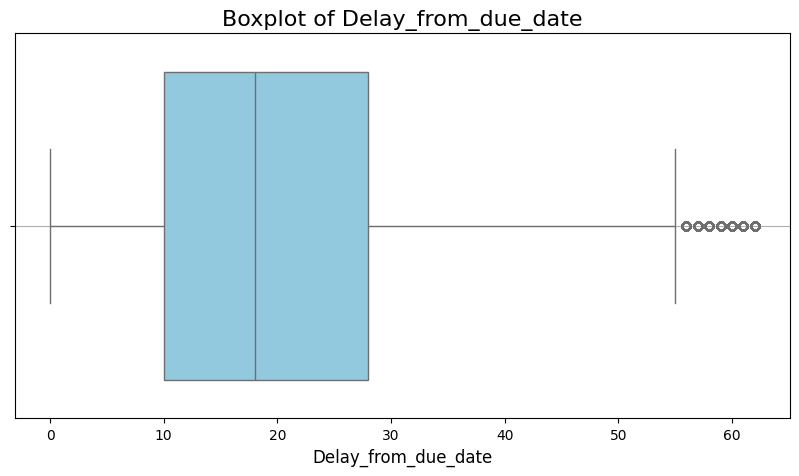

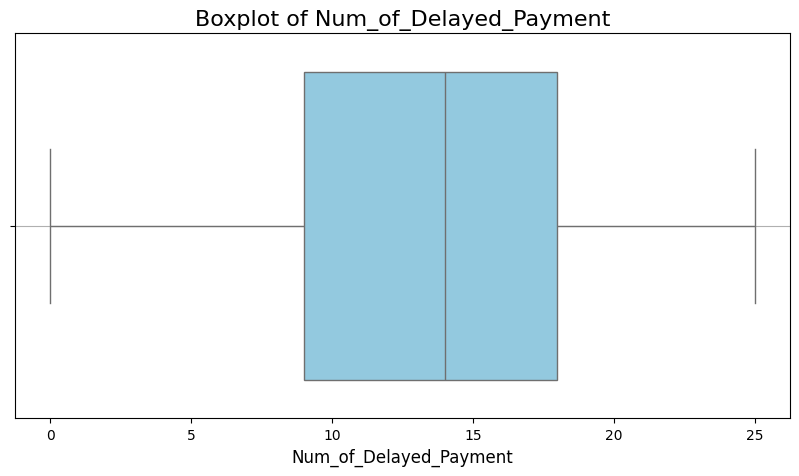

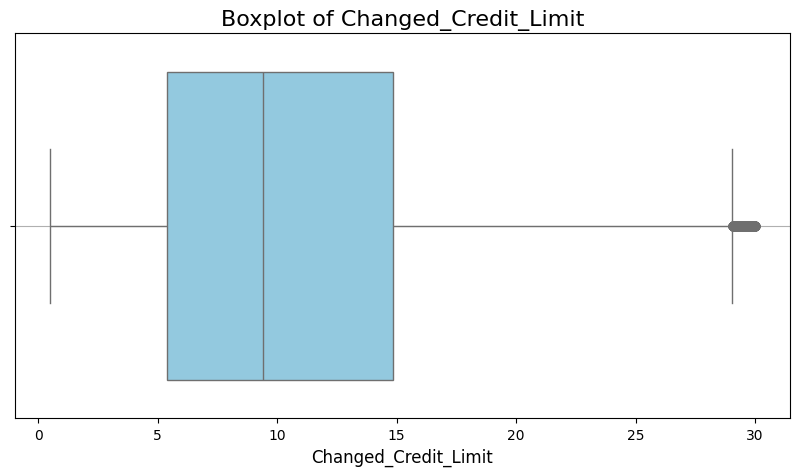

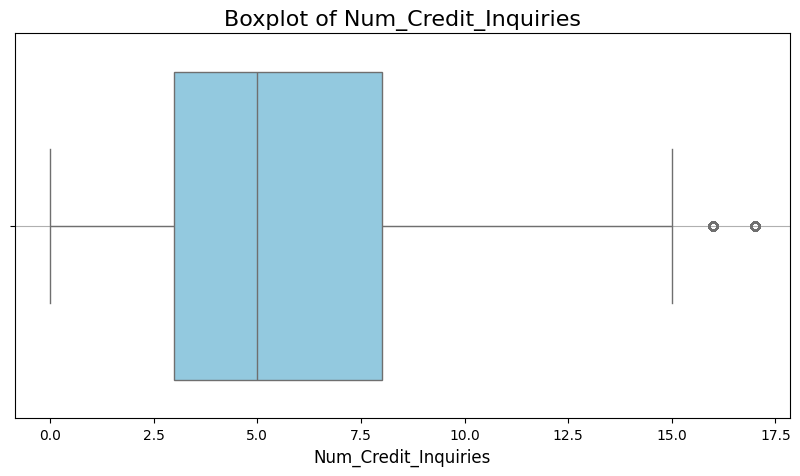

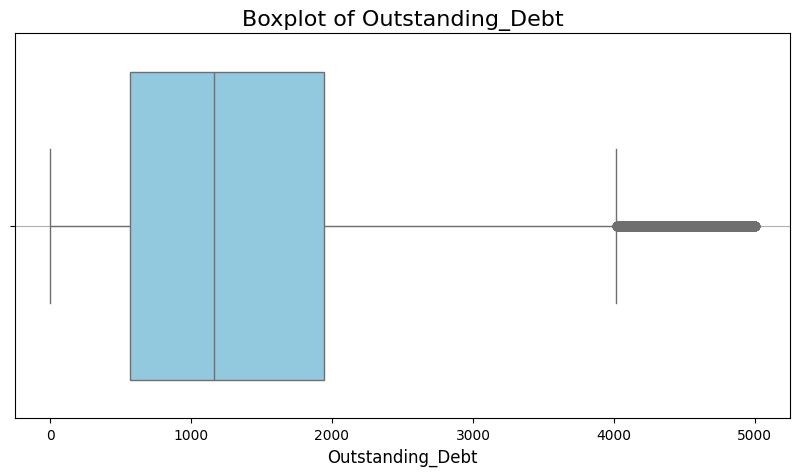

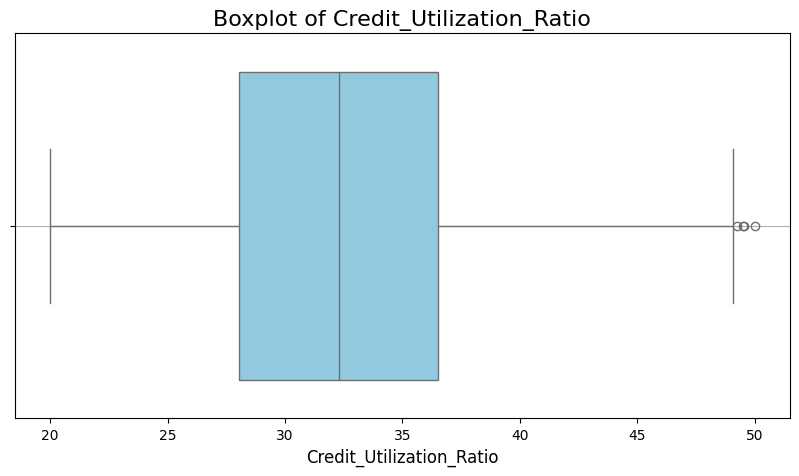

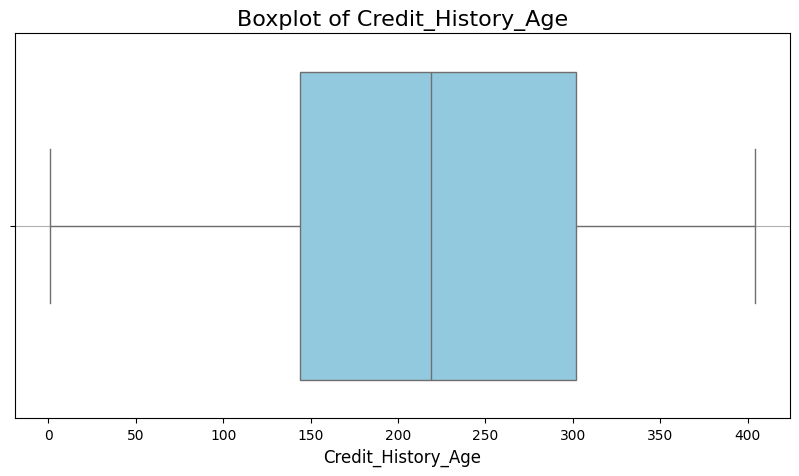

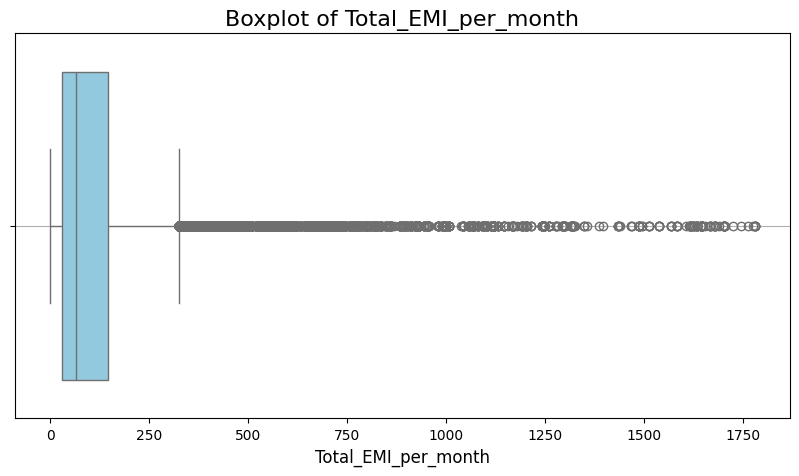

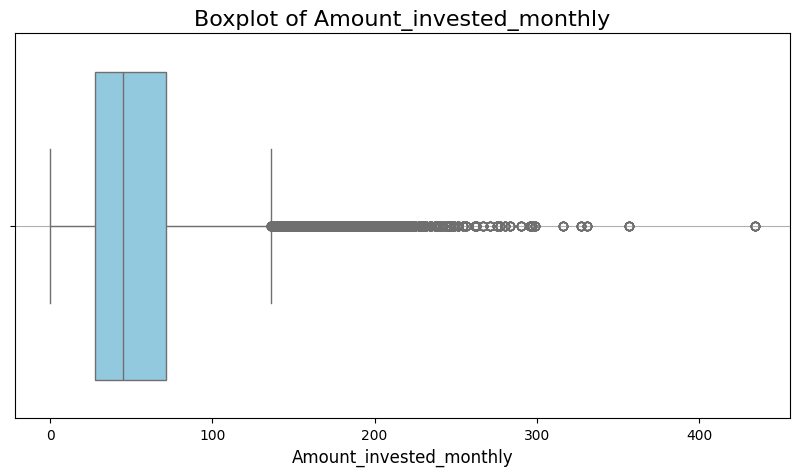

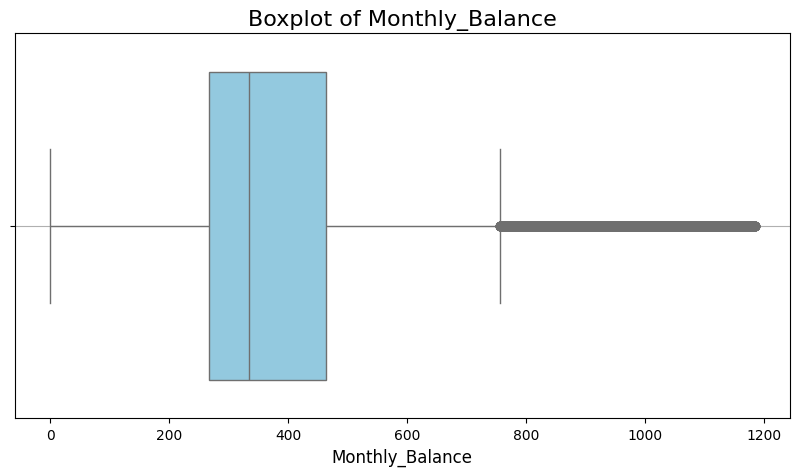

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your dataset loaded as a pandas DataFrame

# 1. General Dataset Information
print("General Dataset Information:\n")
print(data.info())  # Displays data types, non-null counts, and memory usage

# 2. Summary Statistics for All Attributes
print("\nSummary Statistics for All Attributes:\n")
print(data.describe(include='all'))  # Summary statistics for numerical and categorical attributes

# 3. Missing Values
print("\nMissing Values in Each Column:\n")
print(data.isnull().sum())

# 4. Unique Values in Each Column
print("\nUnique Values in Each Column:\n")
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")

# 5. Visualizing All Attributes
# Separate numerical and categorical columns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'credit_score.csv' contains the original dataset
original_data = pd.read_csv('credit_score.csv')  # Reload original data

# ... (rest of your existing code) ...

# 5. Visualizing All Attributes
# Use original_data for visualization
numerical_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                     'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                     'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                     'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
                     'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
categorical_columns = ['Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Type_of_Loan',
                       'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

# Histograms for Numerical Attributes
if len(numerical_columns) > 0:
    print("\nNumerical Attributes - Histograms:")
    for col in numerical_columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(original_data[col].dropna(), bins=30, kde=True, color='skyblue', edgecolor='black')  # Use original_data
        plt.title(f'Distribution of {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(axis='y')
        plt.show()

# Bar Plots for Categorical Attributes
if len(categorical_columns) > 0:
    print("\nCategorical Attributes - Bar Plots:")
    for col in categorical_columns:
        plt.figure(figsize=(10, 5))
        original_data[col].value_counts().plot(kind='bar', color='orange', edgecolor='black')  # Use original_data here
        plt.title(f'Distribution of {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.show()

# 6. Correlation Heatmap (Numerical Attributes Only)
if len(numerical_columns) > 1:
    print("\nCorrelation Heatmap:")
    plt.figure(figsize=(12, 8))
    # Use original_data instead of data for correlation calculation
    correlation_matrix = original_data[numerical_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap', fontsize=16)
    plt.show()

# 7. Boxplots for Outlier Detection (Numerical Attributes)
if len(numerical_columns) > 0:
    print("\nBoxplots for Numerical Attributes:")
    for col in numerical_columns:
        plt.figure(figsize=(10, 5))
        # Use original_data instead of data for boxplots:
        sns.boxplot(x=original_data[col], color='skyblue')
        plt.title(f'Boxplot of {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.grid(axis='y')
        plt.show()
